# Rainiest Month in NYC (2019-2021)

Highest median monthly rainfall is calculated based on three years of precipitation data from 2019 to 2021 using Pandas and Matplotlib. The rain data were collected from the 5 boroughs that make up NYC: Bronx, Brooklyn, Manhattan, Queens, and Staten. 

SOURCE: Precipitation data were from National Centers for Environmental Information (NCEI) of National Oceanic and Atmospheric Administration (NOAA) from URL: https://www.ncei.noaa.gov/pub/data/cirs/climdiv/

In [4]:
reset -fs 

In [5]:
#importing libraries

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [6]:
#importing BRONX rainfall data in csv format into pandas

bronx = pd.read_csv("C:/Users/New User/Desktop/Rainfall/bronx.csv")

In [7]:
#importing BROOKLYN rainfall data in csv format into pandas

brooklyn = pd.read_csv("C:/Users/New User/Desktop/Rainfall/brooklyn.csv")

In [8]:
#importing MANHATTAN rainfall data in csv format into pandas

manhattan = pd.read_csv("C:/Users/New User/Desktop/Rainfall/manhattan.csv")

In [9]:
#importing QUEENS rainfall data in csv format into pandas

queens = pd.read_csv("C:/Users/New User/Desktop/Rainfall/queens.csv")

In [10]:
#importing STATEN rainfall data in csv format into pandas

staten = pd.read_csv("C:/Users/New User/Desktop/Rainfall/staten.csv")

In [11]:
#creating a Pandas DataFrame "nyc_df" of average precipitataion from imported data with DATE and 5 BOROUGHS as headers

nyc_data = [bronx.DATE, bronx.PRECIPITATION, brooklyn.PRECIPITATION, manhattan.PRECIPITATION, queens.PRECIPITATION, staten.PRECIPITATION]
headers = ["DATE", "BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN"]
nyc_df = pd.concat(nyc_data, axis=1, keys=headers)

In [12]:
nyc_df

,DATE,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN
0,2019-01,4.01,3.96,3.88,4.06,4.22
1,2019-02,3.25,3.54,3.39,3.54,3.60
2,2019-03,3.68,3.98,3.87,3.93,3.80
3,2019-04,4.42,4.22,4.24,4.50,3.96
4,2019-05,6.68,7.06,6.97,6.71,7.42
5,2019-06,4.76,5.38,5.25,5.15,5.60
6,2019-07,6.32,6.26,6.24,5.83,6.82
7,2019-08,3.36,4.14,3.96,3.55,5.02
8,2019-09,0.78,1.01,0.89,0.95,1.30
9,2019-10,6.48,6.36,6.62,5.80,6.90


In [13]:
#adding "TOTAL" column to account for total precipitation of all 5 boroughs for each month

nyc_df["TOTAL"] = pd.Series(nyc_df.BRONX + nyc_df.BROOKLYN + nyc_df.MANHATTAN + nyc_df.QUEENS + nyc_df.STATEN)

In [14]:
nyc_df

,DATE,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL
0,2019-01,4.01,3.96,3.88,4.06,4.22,20.13
1,2019-02,3.25,3.54,3.39,3.54,3.60,17.32
2,2019-03,3.68,3.98,3.87,3.93,3.80,19.26
3,2019-04,4.42,4.22,4.24,4.50,3.96,21.34
4,2019-05,6.68,7.06,6.97,6.71,7.42,34.84
5,2019-06,4.76,5.38,5.25,5.15,5.60,26.14
6,2019-07,6.32,6.26,6.24,5.83,6.82,31.47
7,2019-08,3.36,4.14,3.96,3.55,5.02,20.03
8,2019-09,0.78,1.01,0.89,0.95,1.30,4.93
9,2019-10,6.48,6.36,6.62,5.80,6.90,32.16


In [15]:
#dropping "DATE" and "TOTAL" columns so we can calculate "MEDIAN"

nyc_df2 = nyc_df.drop(["DATE", "TOTAL"], axis=1)
nyc_df2

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN
0,4.01,3.96,3.88,4.06,4.22
1,3.25,3.54,3.39,3.54,3.60
2,3.68,3.98,3.87,3.93,3.80
3,4.42,4.22,4.24,4.50,3.96
4,6.68,7.06,6.97,6.71,7.42
5,4.76,5.38,5.25,5.15,5.60
6,6.32,6.26,6.24,5.83,6.82
7,3.36,4.14,3.96,3.55,5.02
8,0.78,1.01,0.89,0.95,1.30
9,6.48,6.36,6.62,5.80,6.90


In [16]:
#adding a new "MEDIAN" column of median precipitation for each month into original df

nyc_df["MEDIAN"] = nyc_df2.median(axis=1)
nyc_df

,DATE,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN
0,2019-01,4.01,3.96,3.88,4.06,4.22,20.13,4.01
1,2019-02,3.25,3.54,3.39,3.54,3.60,17.32,3.54
2,2019-03,3.68,3.98,3.87,3.93,3.80,19.26,3.87
3,2019-04,4.42,4.22,4.24,4.50,3.96,21.34,4.24
4,2019-05,6.68,7.06,6.97,6.71,7.42,34.84,6.97
5,2019-06,4.76,5.38,5.25,5.15,5.60,26.14,5.25
6,2019-07,6.32,6.26,6.24,5.83,6.82,31.47,6.26
7,2019-08,3.36,4.14,3.96,3.55,5.02,20.03,3.96
8,2019-09,0.78,1.01,0.89,0.95,1.30,4.93,0.95
9,2019-10,6.48,6.36,6.62,5.80,6.90,32.16,6.48


In [17]:
nyc_df

,DATE,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN
0,2019-01,4.01,3.96,3.88,4.06,4.22,20.13,4.01
1,2019-02,3.25,3.54,3.39,3.54,3.60,17.32,3.54
2,2019-03,3.68,3.98,3.87,3.93,3.80,19.26,3.87
3,2019-04,4.42,4.22,4.24,4.50,3.96,21.34,4.24
4,2019-05,6.68,7.06,6.97,6.71,7.42,34.84,6.97
5,2019-06,4.76,5.38,5.25,5.15,5.60,26.14,5.25
6,2019-07,6.32,6.26,6.24,5.83,6.82,31.47,6.26
7,2019-08,3.36,4.14,3.96,3.55,5.02,20.03,3.96
8,2019-09,0.78,1.01,0.89,0.95,1.30,4.93,0.95
9,2019-10,6.48,6.36,6.62,5.80,6.90,32.16,6.48


In [18]:
#adding "MONTH" column so we can group the data based on months
#we are splitting the string "2019-01" at ('-') and getting [1] or second index or "01" of "2019-01" after splitting

nyc_df['MONTH'] = nyc_df['DATE'].apply(lambda x: x.split('-')[1])

In [19]:
nyc_df

,DATE,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN,MONTH
0,2019-01,4.01,3.96,3.88,4.06,4.22,20.13,4.01,01
1,2019-02,3.25,3.54,3.39,3.54,3.60,17.32,3.54,02
2,2019-03,3.68,3.98,3.87,3.93,3.80,19.26,3.87,03
3,2019-04,4.42,4.22,4.24,4.50,3.96,21.34,4.24,04
4,2019-05,6.68,7.06,6.97,6.71,7.42,34.84,6.97,05
5,2019-06,4.76,5.38,5.25,5.15,5.60,26.14,5.25,06
6,2019-07,6.32,6.26,6.24,5.83,6.82,31.47,6.26,07
7,2019-08,3.36,4.14,3.96,3.55,5.02,20.03,3.96,08
8,2019-09,0.78,1.01,0.89,0.95,1.30,4.93,0.95,09
9,2019-10,6.48,6.36,6.62,5.80,6.90,32.16,6.48,10


In [20]:
#we are collapsing all the years to show MONTHLY rain by grouping based on on "MONTH"
#we are preserving this MONTHLY rain data into a new DF called "nyc_monthly_rain"
#in showing monthly rain of last 3 years, we are taking median of yearly precipitation of all 5 boroughs for each month of last 3 years, hence, median()

nyc_monthly_rain = pd.DataFrame(nyc_df.groupby('MONTH').median())

In [21]:
nyc_monthly_rain

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN
MONTH,,,,,,,
01,2.21,2.380,2.320,2.310,2.300,11.52,2.310
02,3.25,3.540,3.390,3.540,3.600,17.32,3.540
03,3.68,3.890,3.830,3.930,3.800,19.26,3.830
04,4.42,4.030,4.240,4.050,3.870,20.65,4.050
05,4.56,4.520,4.590,4.410,4.510,22.59,4.520
06,2.85,2.920,3.010,2.360,3.610,14.75,2.920
07,6.32,7.160,6.890,5.830,7.920,34.99,6.890
08,4.28,4.140,4.270,3.850,5.020,20.43,4.070
09,3.75,3.730,3.800,3.690,3.990,18.96,3.750


In [22]:
#resetting indices so all headers are on the same line in the nyc_monthly_rain dataframe

nyc_monthly_rain.reset_index()

,MONTH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN
0,01,2.21,2.380,2.320,2.310,2.300,11.52,2.310
1,02,3.25,3.540,3.390,3.540,3.600,17.32,3.540
2,03,3.68,3.890,3.830,3.930,3.800,19.26,3.830
3,04,4.42,4.030,4.240,4.050,3.870,20.65,4.050
4,05,4.56,4.520,4.590,4.410,4.510,22.59,4.520
5,06,2.85,2.920,3.010,2.360,3.610,14.75,2.920
6,07,6.32,7.160,6.890,5.830,7.920,34.99,6.890
7,08,4.28,4.140,4.270,3.850,5.020,20.43,4.070
8,09,3.75,3.730,3.800,3.690,3.990,18.96,3.750
9,10,5.28,5.230,5.330,5.300,6.040,26.69,5.300


In [23]:
#sorting dataframe with highest median monthly at the top by setting ascending to FALSE

nyc_monthly_rain = nyc_monthly_rain.sort_values('MEDIAN', ascending=False)

In [24]:
#resetting indices again so all the headers are on the same line
#it seems that July is the rainiest month with highest median precipitation of 7.025 inches

nyc_monthly_rain = nyc_monthly_rain.reset_index()
nyc_monthly_rain

,MONTH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN,TOTAL,MEDIAN
0,07,6.32,7.160,6.890,5.830,7.920,34.99,6.890
1,12,5.30,5.680,5.580,5.785,5.735,28.08,5.575
2,10,5.28,5.230,5.330,5.300,6.040,26.69,5.300
3,05,4.56,4.520,4.590,4.410,4.510,22.59,4.520
4,08,4.28,4.140,4.270,3.850,5.020,20.43,4.070
5,04,4.42,4.030,4.240,4.050,3.870,20.65,4.050
6,03,3.68,3.890,3.830,3.930,3.800,19.26,3.830
7,09,3.75,3.730,3.800,3.690,3.990,18.96,3.750
8,02,3.25,3.540,3.390,3.540,3.600,17.32,3.540
9,11,3.11,2.945,3.005,3.150,2.630,14.84,2.970


In [25]:
#saving nyc_monthly_rain dataframe into csv to save data

nyc_monthly_rain.to_csv("C:/Users/New User/Desktop/Rainfall/nyc_monthly_rain.csv")

In [26]:
bar_df = nyc_monthly_rain.sort_values('MONTH')

In [27]:
bar_df['MONTH']

11    01
8     02
6     03
5     04
3     05
10    06
0     07
4     08
7     09
2     10
9     11
1     12
Name: MONTH, dtype: object

In [28]:
bar_df['MEDIAN']

11    2.310
8     3.540
6     3.830
5     4.050
3     4.520
10    2.920
0     6.890
4     4.070
7     3.750
2     5.300
9     2.970
1     5.575
Name: MEDIAN, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

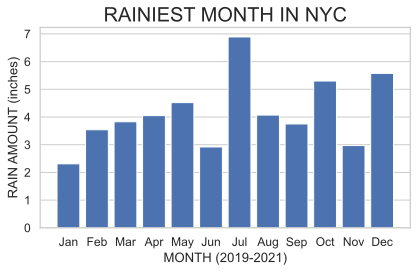

In [34]:
#creating a bar graph showing MONTH VS RAIN AMOUNT
plt.title('RAINIEST MONTH IN NYC', fontsize = 20, loc='center') #title
plt.xlabel('MONTH (2019-2021)') #x-axis of MONTHS
plt.ylabel('RAIN AMOUNT (inches)') #y-axis of inches of rain
ticks_x = np.linspace(0, 11, 12) #spacing tick mark on x-axis from 0 to 12
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #showing 12 months in text
plt.xticks(ticks_x, months) #plotting tick marks and months
plt.grid(axis='x') #using grid to only show horizontal lines

plt.bar(bar_df['MONTH'], bar_df['MEDIAN']); #plotting bar graph
plt.tight_layout()
plt.savefig("rainfall.png")
